### Predicting Car Sales Prices using ANN

In [90]:
# Step-1 : Load and Explore the Dataset

# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
import pickle

In [91]:
# Load the Dataset.
data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

# Print all the Column Names present in the DataFrame.
print("Column_Names:\n",data.columns)
print(" ")

# Print the DataType of every Column.
print("DataType:\n",data.dtypes)
print(" ")

# Print the Shape of the DataFrame
print("Shape of DataFrame:",data.shape)
print(" ")

# Check whether the dataframe contains any Missing Values.
print("Missing_Values:\n",data.isnull().sum())

# Displays first five rows from the Dataset.
data.head()


Column_Names:
 Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')
 
DataType:
 customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object
 
Shape of DataFrame: (500, 9)
 
Missing_Values:
 customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Code Explanation:

-> First we need to import the necessary libraries.

-> Load the Dataset : which loads the csv file into DataFrame.

-> data.columns : Displays all the columns present in the DataFrame.

-> data.dtypes : "dtypes" tells us about what type(datatype) of values does the particular column or feature contains.

-> data.shape() : Displays the shape of the DataFrame, which tells us about how many number of rows and columns does the DataFrame contains.
                  shape(rows, columns).
-> data.isnull().sum() : . isnull(): This method applied to the pandas DataFrame. It returns 'True' when the DataFrame contains Missing   
                           ('NaN' , 'None' , 'NA').
                           .It returns 'False' when there is no Missing Values in the DataFrame.

                           .sum(): This method is then applied to the boolean vales generated by isnull(). Because 'True' is treated as 1 and
                           'False' as 0. sum() effectively counts the number of 'True' values in each column.
                           data.isnull().sum(): returns 0 , when there is no Missing Values in that Particular Column.
                           data.isnull().sum(): returns 1 , when there is a Missing Values in that Particular Column.

-> data.head() : Displays the first five rows from the DataFrame. To check whether the DataFrame is loaded correctly or not.


In [92]:
# Remove Irrelevant(unnecessary) columns

data = data.drop(['customer name','customer e-mail'],axis=1)
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Code Explanation:

-> data.drop : is used to drop the unnecessary columns from the DataFrame, because the unnecessary columns are not usefull for preprocessing.
               So, by dropping these unnecessary columns , helps us to concentrate on the necessary columns that exist in the DataFrame.

-> data.head() : Displays first five rows from the DataFrame, to check whether the unnecessary columns were dropped form the DataFrame or not.

In [93]:
# Step-2 : Preprocessing

# Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[['country']])

# View encoded data
encoded.toarray()
encoder.get_feature_names_out(['country'])
encoded_df = pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out(['country']))
print(encoded_df)


     country_Afghanistan  country_Algeria  country_American Samoa  \
0                    0.0              0.0                     0.0   
1                    0.0              0.0                     0.0   
2                    0.0              1.0                     0.0   
3                    0.0              0.0                     0.0   
4                    0.0              0.0                     0.0   
..                   ...              ...                     ...   
495                  0.0              0.0                     0.0   
496                  0.0              0.0                     0.0   
497                  0.0              0.0                     0.0   
498                  0.0              0.0                     0.0   
499                  0.0              0.0                     0.0   

     country_Andorra  country_Angola  country_Anguilla  country_Antarctica  \
0                0.0             0.0               0.0                 0.0   
1              

### Code Explanation:

-> from sklearn.preprocessing import OneHotEncoder : Imports the OneHotEncoder from scikit-learn, which transforms categorical text data into   
                                                     binary vectors.

-> OneHotEncoder() : Creates a OneHotEncoder object.

-> encoder.fit_transform(data[['country']]) : Fits the encoder and transformsthe words into binary vectors.
                                             Each word becomes a vector with 1 in the position of that word’s column and 0 elsewhere.
-> encoded.toarray() : Converts sparse matrix to dense (used for dataframe conversion).

-> encoder.get_feature_names_out(['country']) : Returns new column names with onehot encoded values.

-> pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out(['country'])) : Store the encoded features into a new DataFrame.

In [94]:
data = pd.concat([data.drop(['country'],axis=1),encoded_df],axis=1)
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_Afghanistan,country_Algeria,country_American Samoa,country_Andorra,...,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Code Explanation:

-> pd.concat([data.drop(['country'],axis=1),encoded_df],axis=1) : Drop original 'country' and append encoded columns to original DataFrame.

-> data.head() : Displays first five rows to check whether the original column 'country' dropped from the DataFrame, and also to check whether
                 the encoded cloumns are appended to the Original DataFrame or not.

In [95]:
# Save Encoder using Pickle

with open("one_hot_encoder.pkl",'wb') as file:
    pickle.dump(encoder,file)


### Code Explanation:

-> with open("one_hot_encoder.pkl",'wb') as file : Creates pickle file and Saves Encoder using Pickle.

-> pickle.dump(encoder,file) : Saves encoder for future use (like when predicting new data). We also use this pickle files for the security of 
                               the code which is present in that pickle file. 


In [96]:
# Split Data into Features (X) and Target Attribute(y)
x = data.drop(['car purchase amount'],axis=1)
y = data['car purchase amount']


### Code Explanation:

-> data.drop(['car purchase amount'],axis=1) : It separats the input features from the entire Data.

-> data['car purchase amount'] : Extracts only the Target variable.

-> These x and y are further used for Training and Testing.

In [97]:
# Split the Dataset into Training and Testing Datasets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Code Explanation:

-> train_test_split(x,y,test_size=0.2,random_state=42) : This function is used to split the Dataset into Training Dataset and Testing
                                                         Dataset, which takes 20% of entire Dataset for Testing and remaining 80% for
                                                         Training.

In [98]:
#Scale the Features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Code Explanation:

-> StandardScaler() : An object 'scaler' is created for further use. This function is used to convert each and every value in every feature
                      into float values. So that the machine can understand easily while training and testing.

-> scaler.fit_transform(x_train) : This function will learn and transform the data in x_train. Here we are using this function because
                                   the machine should learn from the Training Data itself.
                                   
-> scaler.transform(x_test) : This function will only transform the data in x_test in numeric format. Here we are using only tranform
                              function because the machine will not learn from the Test Data. Test Data is only usefull for performing
                              Evaluation.  


In [99]:
# Save scaler using pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### Code Explanation:

-> with open('scaler.pkl','wb') as file : Creates pickle file and Saves Encoder using Pickle.

-> pickle.dump(scaler,file) : Saves scaler for future use (like when predicting new data). We also use this pickle files for the security of 
                               the code which is present in that pickle file. 


In [100]:
# Step-3 : Build the ANN
# Import Required Modules for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [101]:
x_train.shape[1]

216

In [102]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='linear')
])

### Code Explanation:

-> Seuential() : This function is used to create a fully connected Neural Network. which means each and every neuron present in one layer should
                 be connected to each and every neuron in the very next layer with the help od edges. Then it forms a 'Directed Acyclic Graph.'
                 The motive of sequential() is to create a fully connected  Directed Acyclic Graph.

-> Dense() : The Dense is used to create a layers. We can create any number of hidden layers,input layer and output layer using a Dense().

->activation = 'relu'[Rectified Linear Unit] : max(0,1) : The output should be in Normalized. To perform Normalization we use Activation
               function.
               Ex: max(0,30)--> Output--> 30
               Ex: max(0,0.5)--> Output--> 0
               While we are taking input values to max(), every input values are in different datatype format, but the final output of max()
               is 'Positive Integer'. This process is called "Normalization".

-> Dense(64,activation='relu',input_shape=(x_train.shape[1],)) : Here, first Hidden Layer is created, which consists of 64 neurons in it.
                                                                 At the same time we are passing input to the First Hidden Layer using
                                                                 input_shape=(x_train.shape[1]).
-> Dense(32,activation='relu') : Here, Second Hidden Layer is Created. Which consists of 32 Neurons in it. We use 'Relu' as an Activation 
                                 Function to perform Normalization.

-> Dense(1,activation='linear') : Finally a Output Layer is created. Which consists of only 'one' Neuron in it. Because in the Dependent 
                                  feature we have continous values in it. Here we are using 'linear'  for Activation Function because
                                  For Regression task we use 'Linear'.

-> If the output is a Classification Type, the the number of Neurons present in the Output Layer depends on the Number of classes(categories)
   present in the Target or Dependent Feature.
   

-> It the output is a continous values, then we will have only one Neuron in the Output Layer.

In [103]:
# Step 4: Compile the Model
# Import necessary Modules
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
loss = tensorflow.keras.losses.MeanSquaredError()
metrics = tensorflow.keras.metrics.MeanAbsoluteError()

In [104]:
#compile
model.compile(optimizer='adam',loss=loss,metrics=metrics)

### Code Explanation:

-> compile() : The compile() tells how to Train or learn from the Training Data
 

In [105]:
# SetUp EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1)

 ### Code Explanation:

 -> EarlyStopping() : Setup Early Stopping to prevent overfitting.

In [106]:
# Step 5: Train the Model
# Train the Model
train = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 56ms/step - loss: 2048625536.0000 - mean_absolute_error: 43945.2031 - val_loss: 2156704768.0000 - val_mean_absolute_error: 45262.9336
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 2048450560.0000 - mean_absolute_error: 43943.2344 - val_loss: 2156515840.0000 - val_mean_absolute_error: 45260.8438
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 2048231808.0000 - mean_absolute_error: 43940.7461 - val_loss: 2156254976.0000 - val_mean_absolute_error: 45257.9492
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 2047925888.0000 - mean_absolute_error: 43937.3047 - val_loss: 2155888640.0000 - val_mean_absolute_error: 45253.8945
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 2047502848.0000 - mean_absolute_error: 43932.5391 - val_loss: 2155383808.0000 - val_mean_absolute_error: 45248.3516
Epoch 6/100
13/13 [==============================] - 0

### Code Explanation:

-> Training Without EarlyStopping

-> Model trains for all 100 epochs, regardless of performance.

-> Risk of overfitting: model may memorize training data, but perform poorly on test data.

->You're wasting computation if performance plateaus after 40–50 epochs.


In [107]:
train = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[early_stopping_callback])

Epoch 1/100
13/13 [==============================] - 0s 6ms/step - loss: 44820064.0000 - mean_absolute_error: 5178.9082 - val_loss: 79363208.0000 - val_mean_absolute_error: 7163.5088
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 42392296.0000 - mean_absolute_error: 5022.2109 - val_loss: 78447408.0000 - val_mean_absolute_error: 7151.4331
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 40094644.0000 - mean_absolute_error: 4877.8921 - val_loss: 77642208.0000 - val_mean_absolute_error: 7147.7812
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 38106048.0000 - mean_absolute_error: 4747.0522 - val_loss: 77037208.0000 - val_mean_absolute_error: 7148.0483
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 36246136.0000 - mean_absolute_error: 4626.7720 - val_loss: 76571928.0000 - val_mean_absolute_error: 7145.6157
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 34622116.000

### Code Explanation:

-> Training with EarlyStopping.

-> Model monitors the validation loss.

-> If no improvement in val_loss after 5 epochs (patience), training stops.

-> Best weights are restored, so model isn't overtrained.

-> This prevents overfitting, saves time, and leads to a better generalized model.



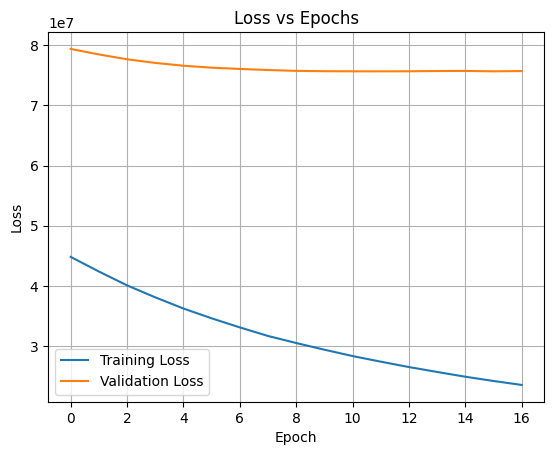

In [108]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Code Explanation:

-> import matplotlib.pyplot as plt.

-> This imports the Matplotlib library, specifically the pyplot module, under the alias plt.

-> pyplot provides MATLAB-like plotting functions in Python.

-> This is necessary for all the following plotting functions.

-> plt.plot(train.history['loss'], label='Training Loss')

-> train.history is a dictionary returned by the model.fit() method.

-> train.history['loss'] contains the list of training loss values at the end of each epoch.

-> plt.plot(...) draws a line graph showing training loss vs. epochs.

📌 This line helps us to track how much the model is learning from the training data.

-> plt.plot(train.history['val_loss'], label='Validation Loss')

-> Similarly, train.history['val_loss'] stores the validation loss per epoch.

-> This shows how well the model performs on unseen data.

-> This line draws the validation loss curve.

-> Useful to detect overfitting:

-> If validation loss starts increasing while training loss decreases → the model is memorizing rather than generalizing.

-> plt.legend()
   Adds a legend to the plot.

-> This makes it easier to differentiate between the two lines (Training Loss, Validation Loss).

-> plt.title("Loss vs Epochs")
   Adds a title to the chart for clarity.

-> plt.xlabel("Epoch")
   Labels the x-axis as "Epochs".

-> An epoch = one complete pass through the training dataset.

-> plt.ylabel("Loss")
   Labels the y-axis as "Loss".

->Lower loss means better predictions.

-> plt.grid(True)
   Adds a grid to the plot for better visual readability.

-> plt.show()
   Displays the actual plot in Jupyter Notebook or Python IDE.

-> This allows us to visually judge:

-> When training and validation diverge (overfitting)

-> Whether early stopping kicked in

-> If the loss flattens (model has converged)



In [109]:
# Save Trained Model
model.save("model.h5")

d:\GEN_AI\A_neural\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Code Explanation:

-> model.save("model.h5") : Save model in HDF5 format, So that we can use this by loading whenever and wherever we want.

In [110]:
# Prediction
prediction = model.predict(x_test)


4/4 [==============================] - 0s 0s/step


### Code Explanation:

-> model.predict : Evaluate Model with Metrics. This prediction is very important, because we will get to know whether the model is trained 
                   correctly or not based on the output of predict itself.
                   It plays a very prominent role on the unseen on new Data.Because x_train data ,we gave model to train, but we don't know
                   whether the model is trained correctly or not. Then we give unseen data (x_test) to the model to predict output. And based on the metrics we used, we will get to know that whether the model is trained correctly or not.

In [111]:
# Step 6: Evaluate the Mode
import tensorflow
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 7128.616659668751
MSE: 75639868.65568109
R-squared: 0.29945674466002725


### Code Explanation:

-> mean_absolute_error, mean_squared_error, r2_score : are used to evaluate the performance of Regression models after making Predictions.

-> mean_squared_error : Measures the average of the squared difference between predicted and actual values. 

-> mean_absolute_error : Measures the average absolute difference between predicted and actual values. It is a more robust measure compared 
   to MSE, as it's less sensitive to outliers.

-> r2_score : R-suared is a statistical measure that indicates how well the model explains the variance in the target variable. It represents
   the proportion of variance explained by the model.

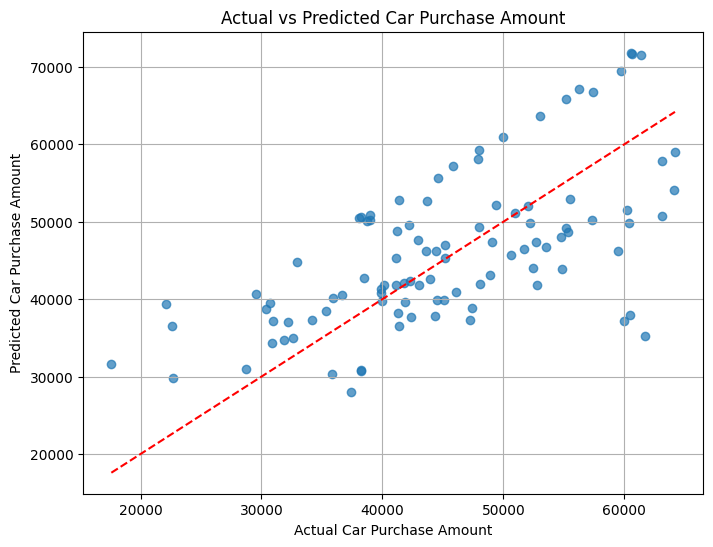

In [112]:
#  Plot Predicted vs Actual Purchase Amounts
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.7)
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.grid(True)
plt.show()

### Code Explanation:

-> import matplotlib.pyplot as plt : It is a powerful python library used to create a 2D plots and graphs for Data Visualization.

-> It helps us to represent the data in a visual format, making it easier to identify patterns, trends and insights.

-> plt.xlabel("Actual Car Purchase Amount") : It helps us to give the label for X-Axis. To Identify the data along x-axis easily.

-> plt.ylabel("Predicted Car Purchase Amount") : It helps us to give the label for Y-Axis. To Identify the data along y-axis easily.

-> plt.title("Actual vs Predicted Car Purchase Amount") : It gives the Title for the entire Graph to get an idea just by reading the title
                                                          of the Visualized graph.
-> plt.figure(figsize=(8, 6)) : It decides the size of the graph to be displayed.(Height and Width).

-> plt.grid(True) : It displays the graph along with the grids which usefull for better understanding about the visualization at each and every 
                    point.

-> plt.show() : It is used to display the entire graph. Without the show() the graph will not get displayed.

-> plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') : This line plots a reference diagonal line (a 45-degree line)
   on the scatter plot. It helps visually compare actual vs predicted values.

-> If a predicted value is perfect, it will fall exactly on this line.

-> The closer your scatter points are to this line, the better your model is performing.

-> y_test.min() = the smallest actual car price in the test set

-> y_test.max() = the largest actual car price in the test set

-> So, this list represents the x-coordinates of the line: from the minimum to maximum actual values.

-> Second Argument: [y_test.min(), y_test.max()]

-> This is again the same range—but now used as the y-coordinates.

-> So both X and Y values go from min → max.

-> This creates a straight line from (min, min) to (max, max)—which is the 45° diagonal line.

-> 'r--'
-> This is a format string:

-> 'r' = red color

-> '--' = dashed line

-> So we are plotting a red dashed diagonal line.





In [113]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
import pickle

### Code Explanation:
 
 ->  load_model('model.h5') : Here we are loading the model because we are going to predict the output for new customer which was manually
     entered details by us.

 ->  Because themodel  predicted the output for the test(x_test) data, but now we are also giving some kind of unseen data as user's wish for
     prediction.
     
 -> Here again we are importing pickle to load the picke files.

In [114]:
with open('one_hot_encoder.pkl','rb') as file:
    one_hot_encoder_country = pickle.load(file)

### Code Explanation:

-> pickle.load(file) : It is used to load the one_hot_encoder file for the 'country' Feature, to encode the categorical data, as this file 
   contain the code related to one_hot_encoding_technique.

-> By loading this one_hot_encoder pickle file, directly we can apply the encoding technique on the new customer data just by using a
   one_hot_encoder_country 

-> Just by loading this one_hot_encoder file there is an advantage called code 'reusability'. So we can load this type of pickle files 
   whenever and wherever we want.

-> It is simple to load and also simple to use without any confusion.

In [115]:
new_customer = {
    "gender": 0,  
    "age": 41.851720,
    "annual Salary": 62812.09301,
    "credit card debt": 11609.380910,
    "net worth": 238961.2505,
    "customer name": "John Doe",
    "customer e-mail": "john@example.com",
    "country": "Bulgaria",
    

}


### Code Explanation:

-> Using 'new_customer' variable we are giving the data manually to check whether the model predicts correctly or not. It is like performing
   evaluation on completely unseen data

In [116]:
input_df = pd.DataFrame([new_customer])
print(input_df)

   gender       age  annual Salary  credit card debt    net worth  \
0       0  41.85172    62812.09301       11609.38091  238961.2505   

  customer name   customer e-mail   country  
0      John Doe  john@example.com  Bulgaria  


### Code Explanation:

-> pd.DataFrame([new_customer]) : The new-customer data is loaded as a DataFrame. Inorder to preprocess the data.

-> print(input_df) : To confirm whether the new_customer data is loaded into dataframe or not.

In [117]:
with open('one_hot_encoder.pkl','rb') as file:
    one_hot_encoder_country = pickle.load(file)

### Code Explanation:

-> pickle.load(file) : It is used to load the one_hot_encoder file for the 'country' Feature, to encode the categorical data, as this file 
   contain the code related to one_hot_encoding_technique.

-> By loading this one_hot_encoder pickle file, directly we can apply the encoding technique on the new customer data just by using a
   one_hot_encoder_country 

-> Just by loading this one_hot_encoder file there is an advantage called code 'reusability'. So we can load this type of pickle files 
   whenever and wherever we want.

-> It is simple to load and also simple to use without any confusion.


In [118]:
one_hot_encoder_country = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_encoder_country.fit(input_df[['country']])


,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


### Code Explanation:

-> one_hot_encoder_country : It is an object created for OneHotEncoder(sparse_output=False,handle_unknown='ignore')
                
-> handle_unknown='ignore' : It tells to ignore the unknown values whenever it occurs.

-> one_hot_encoder_country.fit(data[['country']]) : Fits the one_hot_encoder_country. 

-> fit() : Is used to train the model, nothing but the model will learn.


In [119]:
encoded_country = one_hot_encoder_country.transform(input_df[['country']])
encoded_country_df = pd.DataFrame(encoded_country, columns=one_hot_encoder_country.get_feature_names_out(['country']))

### Code Explanation:

-> one_hot_encoder_country.transform(input_df[['country']]) : Transforms each and every value into binary vectors.
                                             Each value becomes a vector with 1 in the position of that value's column and 0 elsewhere.

-> one_hot_encoder_country.get_feature_names_out(['country']) : Returns new column names with onehot encoded values.

-> pd.DataFrame(encoded_country,columns=encoder.get_feature_names_out(['country'])) : Store the encoded features into a new DataFrame.

In [120]:
input_df = pd.concat([input_df.drop('country',axis=1),encoded_country_df],axis=1)

### Code Explanation:

-> concat([input_df.drop('country',axis=1),encoded_country_df],axis=1)Drop original 'country' and append encoded_country_df columns to 
   original DataFrame.

-> axis = 1 : Indicates the columns.

In [121]:
with open('scaler.pkl','rb') as file:
    scaler = pickle.load(file)

### Code Explanation:

-> pickle.load(file) : It is used to load the scaler.pkl file, to make the machine to understand very easily.

-> By loading this scaler pickle file, directly we can apply the StandardScaler() technique on the new customer data just by using a
   scaler.

-> Just by loading this scaler.pkl file there is an advantage called code 'reusability'. So we can load this type of pickle files 
   whenever and wherever we want.

-> It is simple to load and also simple to use without any confusion.


In [124]:
#Step 7: Make Predictions
original_columns = x.columns  # 'x' is what you trained the scaler on

# Add any missing columns with 0 (in case a country wasn't used in test input)
for col in original_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Reorder columns to match training order
input_df = input_df[original_columns]

# Now scale
input_scaled = scaler.transform(input_df)

### Code Explanation:

-> x : 'x' is what we trained the scaler on.

-> The above code is for adding any missing columns (like country columns that may not be in this new data).

-> input_df[original_columns] : Reorder columns to match training order.

-> scaler.transform(input_df) : Perform scalling on new input data.

In [125]:
predicts = model.predict(input_scaled)
print(predicts)

1/1 [==============================] - 0s 43ms/step
[[38433.887]]


### Code Explanation:

-> model.predict(input_scaled) : It predicts the output on a user-input(new_customer) data. 